# Занятие 7
# Алгебра
https://docs.sympy.org/latest/search.html?q=geometry

## Прямые и плоскости в пространстве. Модуль Geometry

Методы для изучения:

 are_concurrent(*planes) определяет, пересекаются ли все плоскоси по одной прямой, число плоскостей произвольное

are_concurrent(*lines) определяет, пересекаются ли все прямые в одной точке, число прямых произвольное

 distance(o)   расстояние между плоскостью и другим геометрическим объектом

 equals(o)   возвращает True, если self и o одинаковые математические объекты

 intersection(o)  пересечение с геометрическим объектом o  
 
 
### Пример 1.

Даны точки: A(1,2,3),  B(-5,1,7), 
C(3,-2,6), 
D(-1,2,4), 
F(5,1,7), 
K(8,27,33), 
M(16,24,32)
P(14,28,29).

Определить, пересекаются ли по общей прямой плоскости 

а) ABC, ABK и ABF

б) ABC и AFK

Определить, пересекаются ли в одной точке прямые 

а) AB и СD

б) AB и FK

In [1]:
import sympy as sp
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [2]:
A=sp.Point(1,2,3)
B=sp.Point(-5,1,7)
C=sp.Point(3,-2,6)
ABC=sp.Plane(A,B,C)
D=sp.Point(-1,2,4)
F=sp.Point(5,1,7)
K=sp.Point(8,27,33) 
M=sp.Point(16,24,32)
P=sp.Point(14,28,29)
ABD=sp.Plane(A,B,D)
ABF=sp.Plane(A,B,F)
ABK=sp.Plane(A,B,K)
AFK=sp.Plane(A,F,K)
PKM=sp.Plane(P,K,M)
AB=sp.Line(A,B)
CD=sp.Line(C,D)
FK=sp.Line(F,K)
print('пересекаются ли по общей прямой ABC, ABK и ABF: '+str(sp.Plane.are_concurrent(ABC,ABK,ABF)))
print('пересекаются ли по общей прямой ABC и PKM: '+str(sp.Plane.are_concurrent(ABC,PKM)))
print('пересекаются ли в одной точке прямые  AB и СD: '+str(sp.Line.are_concurrent(AB,CD)))
print('пересекаются ли в одной точке прямые  AB и FK: '+str(sp.Line.are_concurrent(AB,FK)))

пересекаются ли по общей прямой ABC, ABK и ABF: True
пересекаются ли по общей прямой ABC и PKM: False
пересекаются ли в одной точке прямые  AB и СD: True
пересекаются ли в одной точке прямые  AB и FK: False


### Пример 2
Найти расстояние до плоскости ABC:

а) от точки F

б) от прямой KM

в) от плоскости PKM 

In [3]:
print('расстояние от  F до  ABC: '+str(ABC.distance(F)))
KM=sp.Line(K,M)

print('расстояние от  KM до  ABC: '+str(ABC.distance(KM)))


print('расстояние от  PKM до  ABC: '+str(ABC.distance(PKM)))

расстояние от  F до  ABC: 10/3
расстояние от  KM до  ABC: 39
расстояние от  PKM до  ABC: 39


### Пример 3
Определить, совпадают ли плоскости 

a) ABD и ABC

б) ABD и ABF

In [4]:
ABD.equals(ABC), ABD.equals(ABF)

(True, False)

### Пример 4

Найти пересечение плоскостей ABD и СКМ

In [5]:
CKM=sp.Plane(C,K,M)
display(ABD.intersection(CKM))
display(ABD.intersection(KM))
DF=sp.Line(D,F)
display(ABD.intersection(DF))
display(KM.intersection(DF))

### Пример 5

Выбор случайной точки на плоскости ABC:

In [6]:
R=ABC.random_point()
R

### Пример 6
Выбор произвольной точки на плоскости ABC:

In [7]:
Q1=ABC.arbitrary_point('u','v')
display(Q1)
Q2=ABC.arbitrary_point('s')
display(Q2)
Q3=ABC.arbitrary_point()
display(Q3)

### Пример 7

Использование произвольной точки на плоскости ABC:

Q1 - произвольная точка плоскости ABC

проверим, пересекает ли прямая AQ1 плоскость CKM и 
проходит ли прямая AQ1 через точку D

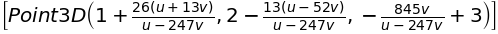

In [8]:
AQ1=sp.Line(A,Q1)
display(CKM.intersection(AQ1))
display(AQ1.intersection(D))

### Пример 8

### Работа со словарями
https://docs.python.org/3/c-api/dict.html?highlight=dictionary

Пример словаря:

создадим словари

а) всех точек

б) прямых, проходящих через эти точки

In [9]:
Points_list=[A,B,C,D,F,K,M]
Point_names=['A','B','C','D','F','K','M']
points_numbers=range(len(Point_names))
Points=dict([(Point_names[i],Points_list[i]) for i in points_numbers])
Points

{'A': Point3D(1, 2, 3),
 'B': Point3D(-5, 1, 7),
 'C': Point3D(3, -2, 6),
 'D': Point3D(-1, 2, 4),
 'F': Point3D(5, 1, 7),
 'K': Point3D(8, 27, 33),
 'M': Point3D(16, 24, 32)}

Вызовем точку А по ее имени:

In [10]:
Points.get('A')

Построим словарь прямых, проходящих через точки, используя присвоение по ключу.

(Присвоение по существующему ключу перезаписывает значение элемента словаря, 

присвоение по несуществующему ключу добавляет новую запись в словарь)

In [11]:
Points.keys()

dict_keys(['A', 'B', 'C', 'D', 'F', 'K', 'M'])

In [12]:
lines={}
for P1 in Points.keys():
    for P2 in Points.keys():
        if P1!=P2:
            lines[P1+P2]=sp.Line(Points[P1],Points[P2])
lines            

{'AB': Line3D(Point3D(1, 2, 3), Point3D(-5, 1, 7)),
 'AC': Line3D(Point3D(1, 2, 3), Point3D(3, -2, 6)),
 'AD': Line3D(Point3D(1, 2, 3), Point3D(-1, 2, 4)),
 'AF': Line3D(Point3D(1, 2, 3), Point3D(5, 1, 7)),
 'AK': Line3D(Point3D(1, 2, 3), Point3D(8, 27, 33)),
 'AM': Line3D(Point3D(1, 2, 3), Point3D(16, 24, 32)),
 'BA': Line3D(Point3D(-5, 1, 7), Point3D(1, 2, 3)),
 'BC': Line3D(Point3D(-5, 1, 7), Point3D(3, -2, 6)),
 'BD': Line3D(Point3D(-5, 1, 7), Point3D(-1, 2, 4)),
 'BF': Line3D(Point3D(-5, 1, 7), Point3D(5, 1, 7)),
 'BK': Line3D(Point3D(-5, 1, 7), Point3D(8, 27, 33)),
 'BM': Line3D(Point3D(-5, 1, 7), Point3D(16, 24, 32)),
 'CA': Line3D(Point3D(3, -2, 6), Point3D(1, 2, 3)),
 'CB': Line3D(Point3D(3, -2, 6), Point3D(-5, 1, 7)),
 'CD': Line3D(Point3D(3, -2, 6), Point3D(-1, 2, 4)),
 'CF': Line3D(Point3D(3, -2, 6), Point3D(5, 1, 7)),
 'CK': Line3D(Point3D(3, -2, 6), Point3D(8, 27, 33)),
 'CM': Line3D(Point3D(3, -2, 6), Point3D(16, 24, 32)),
 'DA': Line3D(Point3D(-1, 2, 4), Point3D(1, 2, 3

Проверим, что прямые АВ и ВА совпадают:

In [13]:
lines['AB'].equals(lines['BA'])

True

In [14]:
lines[input()]

AK
